In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection   import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import tree
from sklearn import preprocessing
%matplotlib inline

In [2]:
Dataset_file = pd.read_csv("heart_failure_clinical_records_dataset.csv")
print(Dataset_file.shape)
Dataset_file.head(10)

(299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


Text(0, 0.5, 'Number of Observations')

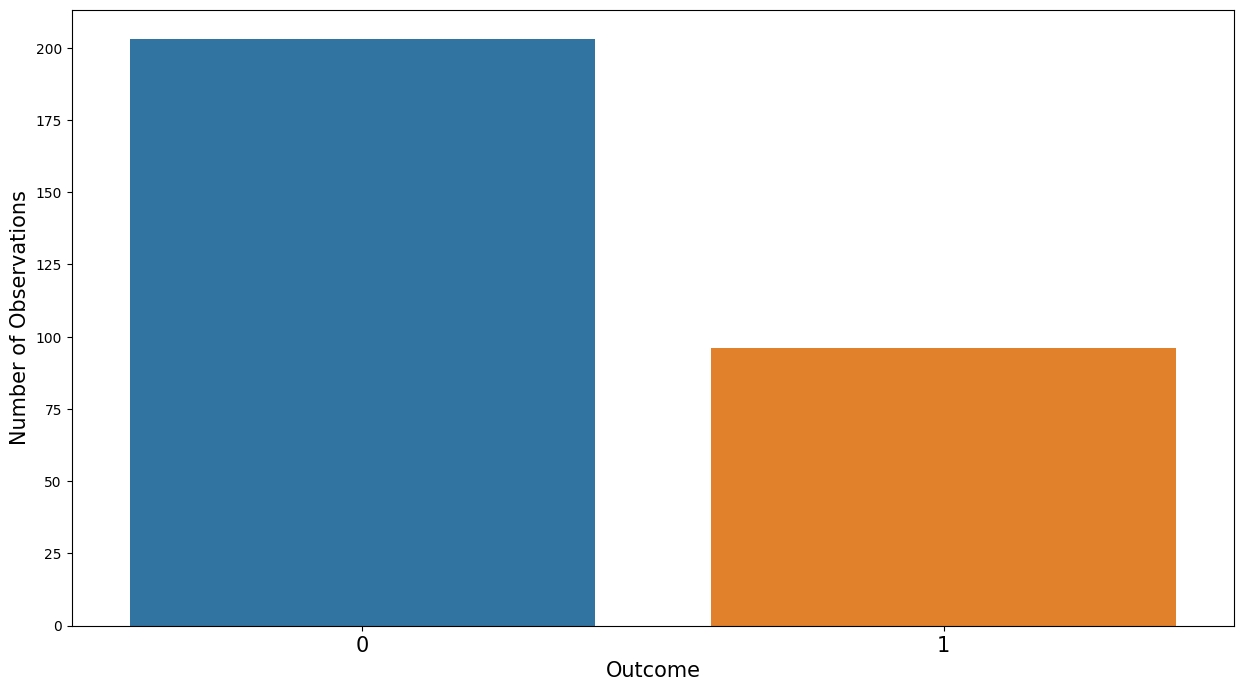

In [5]:
#Histogram to show the distribution of the TARGET values
plt.figure(figsize=(15,8))
ax = sns.countplot(x="DEATH_EVENT", data=Dataset_file)
plt.xlabel('Outcome',size=15)
plt.xticks(size=15)
plt.ylabel('Number of Observations',size=15)

In [6]:
#Create a new dataframe to hold the rows for each target value ('0' and '1')
Outcome_0 = Dataset_file[Dataset_file['DEATH_EVENT'] == 0]
Outcome_1 = Dataset_file[Dataset_file['DEATH_EVENT'] == 1]

In [8]:
Count_Outcome_1 = Outcome_1.DEATH_EVENT.count()             
Outcome_0_Reduced = Outcome_0.sample(Count_Outcome_1)  
Balanced_Dataset_file = pd.concat([Outcome_0_Reduced,Outcome_1], axis=0)
print(Balanced_Dataset_file.shape)

(192, 13)


Text(0, 0.5, 'Number of Observations')

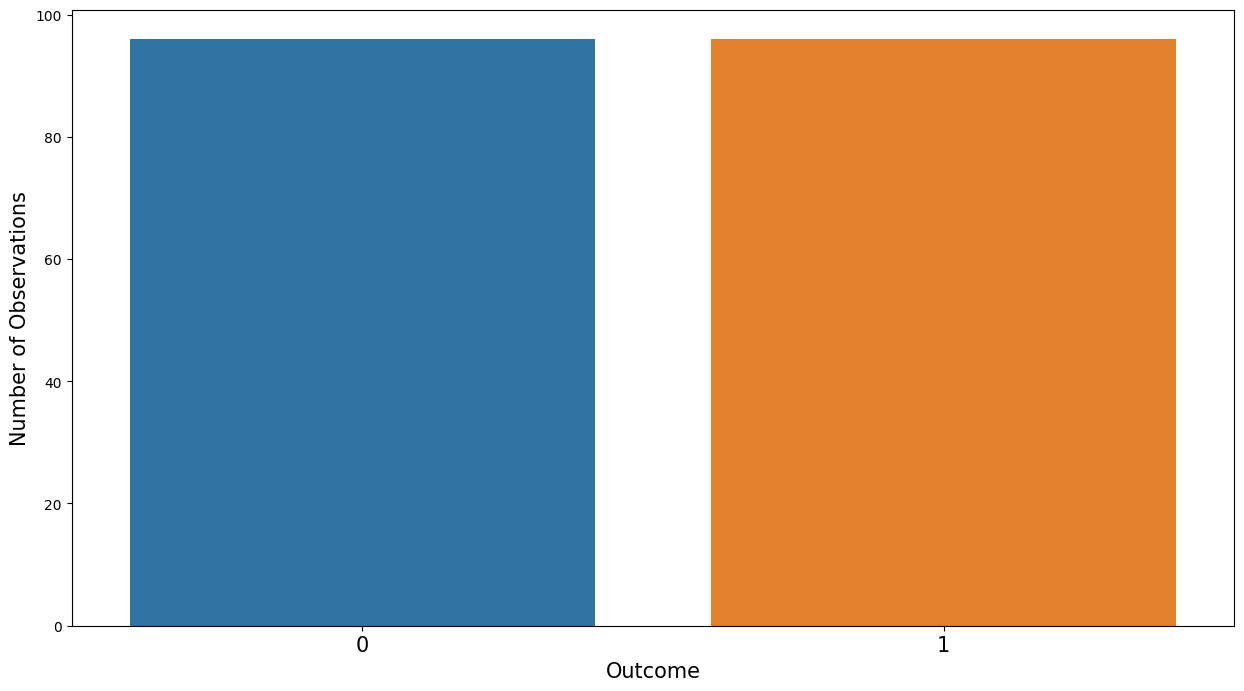

In [9]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="DEATH_EVENT", data=Balanced_Dataset_file)
plt.xlabel('Outcome',size=15)
plt.xticks(size=15)
plt.ylabel('Number of Observations',size=15)

In [10]:
Balanced_Dataset_file.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
241,65.0,0,582,1,30,0,249000.0,1.3,136,1,1,212,0
205,50.0,1,167,1,45,0,362000.0,1.0,136,0,0,187,0
290,45.0,0,615,1,55,0,222000.0,0.8,141,0,0,257,0
247,64.0,0,143,0,25,0,246000.0,2.4,135,1,0,214,0
78,75.0,1,203,1,38,1,283000.0,0.6,131,1,1,74,0


In [ ]:
Dataset_Analysis = pd.DataFrame(Balanced_Dataset_file)
Y  = Dataset_Analysis['DEATH_EVENT'] 
del Dataset_Analysis['DEATH_EVENT']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(Dataset_Analysis)
scaled_Attributes = scaler.transform(Dataset_Analysis)
#Convert to table format - MinMaxScaler
X = pd.DataFrame(data=scaled_Attributes, index=Dataset_Analysis.index, columns=Dataset_Analysis.columns)
X.sample(5)

In [ ]:
#Build a forest and compute the importance of each attribute.
forest = ExtraTreesClassifier(n_estimators=250, random_state=0) # for classification task
forest.fit(X,Y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

In [ ]:
#Plot the attributes importances, in descending order of importance.
plt.figure(figsize=(15,10))
plt.ylabel('Importance Level\n',size=15)
plt.xlabel('\nAttribute Number',size=15)
plt.bar(range(X.shape[1]), importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]), indices, size=10)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
#Remove the attributes with the lowest importances 
del X['anaemia']
del X['diabetes']
del X['high_blood_pressure']
del X['sex']
del X['smoking']
X.sample(5)

In [ ]:
#Split the data into training/testing sets 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [ ]:
#Build a Logistic Regression model 
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression().fit(x_train,y_train)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = LR_model.predict(x_test)
Prediction_accuracy = accuracy_score(y_test, y_pred)
print('Prediction accuracy score:\t %0.2f'   % (Prediction_accuracy * 100))
print("\nPredicted values are:\n",y_pred)

In [ ]:
Prediction_conf_matrix = confusion_matrix(y_test, y_pred)
print('\nThe confusion matrix is :\n',Prediction_conf_matrix)